In [25]:
import numpy as np
import os
import matplotlib.pyplot as plt
import scipy.constants as sc
from importlib import reload
import AHM
reload(AHM)
#n=0
date = '160925'

In [26]:
k = np.linspace(0, 2*np.pi, 40)


In [27]:
n

2

In [28]:
#n+=1
da=1
db=0
dc=da
na=0
nb=0
nc=na
alpha=0.7


In [29]:
n+=1
Tarr = np.linspace(0,0.08,15)
#Tarr = np.concatenate((np.linspace(0,0.5,10), np.linspace(15,25,10)))
ds = np.zeros((3,1), dtype=complex)
ns = np.zeros((3,1), dtype=complex)
for t in Tarr:
    print(t)
    mM = AHM.Model(Del0A = da, Del0B=db, Del0C= dc, nA=na, nB=nb, nC=nc, U=1, UB=1, muB=0, mu=0, t=1, inhomp=True, inhomi=True)
    vals = mM.Deltra(k, T=t, g=0.001, HF=False, Nmax=100, Nmin=10, alpha=alpha)
    ds = np.concatenate((ds, vals[0][:,-1].reshape(3,1)), axis=1)



0.0
0.005714285714285714
0.011428571428571429
0.017142857142857144
0.022857142857142857
0.02857142857142857
0.03428571428571429
0.04
0.045714285714285714
0.05142857142857143
0.05714285714285714
0.06285714285714286
0.06857142857142857
0.07428571428571429
0.08


In [30]:
ds

array([[0.        +0.j, 0.28030751+0.j, 0.28030716+0.j, 0.28030634+0.j,
        0.28030301+0.j, 0.28029263+0.j, 0.28026248+0.j, 0.28017208+0.j,
        0.27994857+0.j, 0.27950329+0.j, 0.27875181+0.j, 0.2759634 +0.j,
        0.27432965+0.j, 0.27222952+0.j, 0.26813246+0.j, 0.26496201+0.j],
       [0.        +0.j, 0.05388986+0.j, 0.05388916+0.j, 0.05388753+0.j,
        0.05388091+0.j, 0.05386357+0.j, 0.0538414 +0.j, 0.05383829+0.j,
        0.05389436+0.j, 0.05405631+0.j, 0.05436743+0.j, 0.05396574+0.j,
        0.05470828+0.j, 0.05567827+0.j, 0.0562829 +0.j, 0.05777308+0.j],
       [0.        +0.j, 0.28030751+0.j, 0.28030716+0.j, 0.28030634+0.j,
        0.28030301+0.j, 0.28029263+0.j, 0.28026248+0.j, 0.28017208+0.j,
        0.27994857+0.j, 0.27950329+0.j, 0.27875181+0.j, 0.2759634 +0.j,
        0.27432965+0.j, 0.27222952+0.j, 0.26813246+0.j, 0.26496201+0.j]])

In [31]:
fol = f'calc{date}_{n}'
newpath = r"C:\Users\atsch\Desktop\MasterVorlesungen\Sommer25\Lieb-Lattice\Pictures\temp\'"+fol

if not os.path.exists(newpath):
    os.makedirs(newpath)

filename = "parameters.txt"

text = os.path.join(newpath, filename)

with open(text, "w") as file:
    file.write(f"mM = AHM.Model(Del0A, Del0B, Del0C= {da, db, dc}, nA, nB, nC={na, nb, nc}, U={mM.U}, UB={mM.UB}, mu={mM.mu}, muB={mM.muB}, t={mM.t}, inhomp={mM.inhomp}, inhomi={mM.inhomi})\n alpha={alpha}\n Temperature={Tarr}\n dels: {ds}\nnus: {ns}")
    file.close

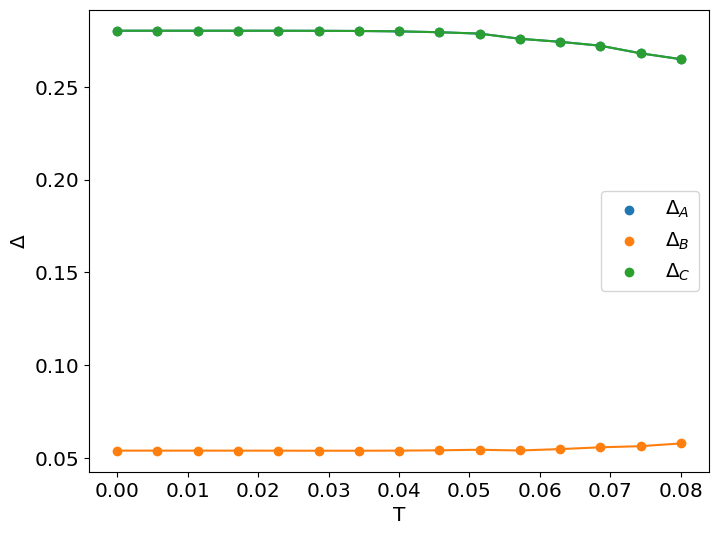

In [32]:
plt.figure(figsize=(8,6))
plt.xlabel('T', size='x-large')
plt.ylabel(r'$\Delta$', size='x-large')
plt.xticks(size='x-large')
plt.yticks(size='x-large')

labels=[r'$\Delta_A$', r'$\Delta_B$', r'$\Delta_C$']
for i in range(3):
    plt.scatter(Tarr,np.abs(ds[i,1:]), label=labels[i])
    plt.plot(Tarr,np.abs(ds[i,1:]))

plt.legend(fontsize='x-large')
plt.savefig(newpath +"\\Temp.png")
plt.show()

In [33]:
sd = np.sum(np.abs(ds), axis=0)

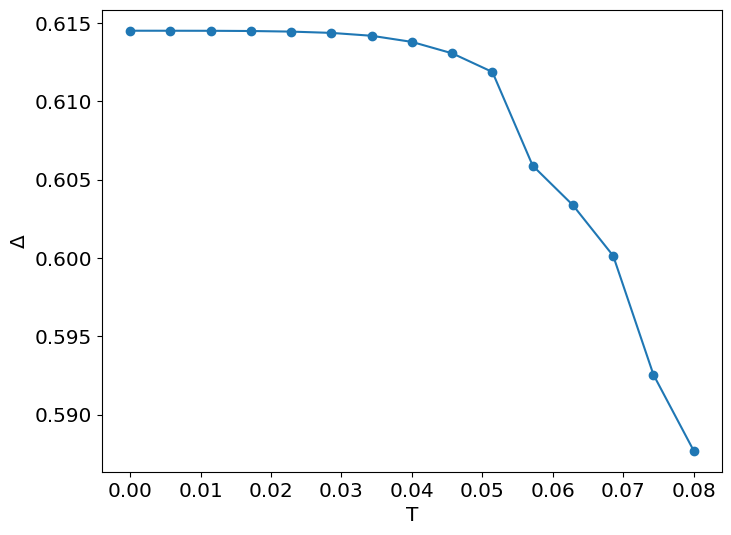

In [34]:
plt.figure(figsize=(8,6))
plt.xlabel('T', size='x-large')
plt.ylabel(r'$\Delta$', size='x-large')
plt.xticks(size='x-large')
plt.yticks(size='x-large')

plt.scatter(Tarr,sd[1:])
plt.plot(Tarr,sd[1:])

#plt.legend(fontsize='x-large')
plt.savefig(newpath +"\\Temp_summed.png")
plt.show()